# Trabalho 2 - C√°lculo Num√©rico

### Estudos sobre: Decomposi√ß√£o SVD, M√©todos de Interpola√ß√£o e M√≠nimos Quadrados.

- **Data**: 9 de Junho de 2024 ;
- **Disciplina**: SME0104 - C√°lculo Num√©rico (2024) (ICMC - USP) ;
- **Docente**: Cynthia de Oliveira Lage Ferreira ;
- **autores do trabalho:
  - Laura Fernandes Camargos - 13692334
  - Vicenzo D¬¥Arezzo Zilio - 13671790



## Defini√ß√µes e Depend√™ncia

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
from PIL import Image
from scipy.interpolate import interp1d

FILE_PATH = "/content/cat.png"
FILE_PATH_2 = "casosacumuladosbrasilatuaizado.txt"

# Exerc√≠cio 1: Compress√£o de Imagens
- Decomposi√ß√£o de Valor Singular utilizando o M√©todo de Francis e decomposi√ß√£o QR.

## a) Implementa√ß√£o do Algoritmo de Francis

Algoritmo de Francis √© um m√©todo de c√°lculo num√©rico que estende a decomposi√ß√£o QR, obtendo os autovalores e autovetores de uma matriz iterativamente. A vers√£o utilizada utiliza como base a decomposi√ß√£o implementada pela biblioteca ```numpy```.

- Para a determina√ß√£o do erro, utilizou-se: $Erro(x) = | x |_{‚àû}$

In [10]:
def francis(A, tol=1e-10, max_iter=1000, list_flag=False):
    """
    M√©todo de Francis para calcular autovalores e autovetores de uma matriz.

    Par√¢metros:
    A : ndarray
        Matriz quadrada cujos autovalores e autovetores ser√£o calculados.
    tol : float
        Toler√¢ncia para o crit√©rio de parada.
    max_iter : int
        N√∫mero m√°ximo de itera√ß√µes permitidas.
    list_flag : boolean
        valor l√≥gico que representa a maneira com que o retorno dos autovalores
        ser√° representado:
          - False: representa√ß√£o como matriz diagonal;
          - True: representa√ß√£o como vetor unidimensional.

    Retorna:
    D : ndarray
        Vetor (ou matriz) com os autovalores da matriz A.
    V : ndarray
        Matriz cujas colunas s√£o os autovetores correspondentes aos autovalores.
    """
    n = A.shape[0]
    V = np.eye(n) # identidade
    A_local = np.copy(A)
    iter_count = 0

    while iter_count < max_iter:

        Q, R = np.linalg.qr(A_local)
        A_local = R @ Q
        V = V @ Q

        erro = np.linalg.norm(np.tril(A_local, -1), ord=np.inf)

        if erro < tol:
            break

        iter_count += 1

        if not (iter_count < max_iter):
          print("m√°ximo de itera√ß√µes atingida")

    D = np.diag(A_local)

    if not list_flag : D =  np.diag(D)

    return D, V


## b) Implementa√ß√£o da decomposi√ß√£o SVD

Decomposi√ß√£o SVD √© um m√©todo alg√©brico que permite decompor uma matriz conforme:

\\

$$
S = U \cdot \Sigma \cdot V
$$

\\

- U e V s√£o matrizes orgonais, que cont√©m os autovetores de $SS^t$ e $S^tS$, respectivamente;
- $\Sigma$ √© uma matriz diagonal, que cont√©m os autovalores de $S$ ao quadrado;

\\

A t√©cnica empregada para a decomposi√ß√£o de imagens nesse exerc√≠cio √©:
-  primeiro, garantir que a matriz seja quadrada, utilizando $M_{k,k}$ sendo $k$ o menor entre n√∫mero de linhas e n√∫mero de colunas.
- Posteriormente, realizar a decomposi√ß√£o dessa matriz quadrada e realizar a reconstru√ß√£o da matriz utilizando a igualdade do teorema. Por√©m, para realizar a compress√£o, truncamos a multiplica√ß√£o dessas matrizes atrav√©s do uso dos N primeiros autovalores e autovetores somente. Nesse sentido, √† medida que usamos mais autovalores, mais prr√≥xima a imagem √© da original.


In [11]:
def svd(A, eigenvalue_percentage):

  print("SVD")

  error_francis = 1e-6

  m, n = A.shape

  k = m if m <= n else n

  A = A[:k, :k]

  S, V = francis(A.T @ A, error_francis, list_flag=False)

  S = np.sqrt(np.abs(S))


  U = A @ V @ np.linalg.inv(S)


  eigenvalue_percentage = int((eigenvalue_percentage/100) * (m * n) / (n + m + 1))

  print(eigenvalue_percentage)

  U_t = U[:, :eigenvalue_percentage]
  S_t = S[:eigenvalue_percentage, :eigenvalue_percentage]
  V_t = V[:, :eigenvalue_percentage]
  V_t = V_t.T

  return U, S, V, U @ S @ V.T

In [14]:


# img_f = img.dtype
# m, n = img.shape

# k = m if m <= n else n

# img_sq = img[:k, :k]

# U, S, Vt = svds(img, k = int(k * 0.5))

# # Inverter a ordem dos valores singulares e dos vetores correspondentes para obter a ordem decrescente
# U = U[:, ::-1]
# S = S[::-1]
# Vt = Vt[::-1, :]

# print(U @ S @ Vt)

from scipy.sparse.linalg import svds

def numpy_svd(img, percentage):

  img = img.astype(float)

  m, n = img.shape

  k = m if m <= n else n

  img_sq = img[:k, :k]

  U, S, Vt = svds(img, k = int(k * percentage))

  return U @ np.diag(S) @ Vt


## c) Conclus√£o e Compara√ß√£o de Resultados

- **Tempo de Execu√ß√£o**: A vers√£o implementada utilizando Francis demora significativamente mais para calcular a imagem. Por√©m, utilizando essa metodologia, desenvolvendo o m√©todo de obten√ß√£o dos autovalores e autovetores, podemos ter um controle maior do erro n√∫merico.

- **Resultado**: Como pode se obsevar, ambos os resultados s√£o evidentemente equivalentes, tanto visualmente, vendo as imagens, quanto observando as matrizes finais.

SVD
m√°ximo de itera√ß√µes atingida
113


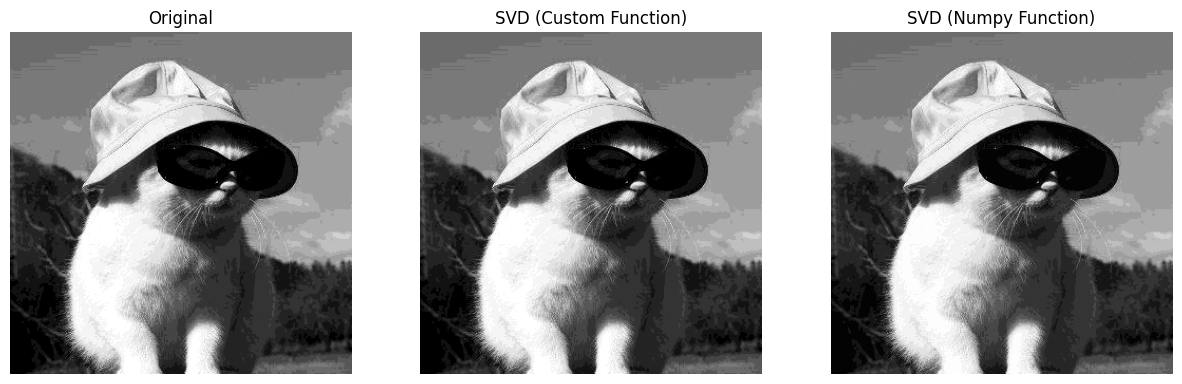

In [16]:
# img = mpimg.imread(FILE_PATH)
# img = mcolors.rgb_to_gray(img)

img_original = Image.open(FILE_PATH)
img_original = img_original.convert('L')
img_original = np.asarray(img_original)

_, _, _, img_svd_org = svd(img_original, 70)

img_np = numpy_svd(img_original, 0.7)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img_original, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(img_svd_org, cmap='gray')
axes[1].set_title('SVD (Custom Function)')
axes[1].axis('off')

axes[2].imshow(img_np, cmap='gray')
axes[2].set_title('SVD (Numpy Function)')
axes[2].axis('off')

plt.show()


In [17]:
print(f"Matriz obtida pelo m√©todo implementado:\n {img_svd_org}\n\n")
print(f"Matriz obtida pelo m√©todo implementado:\n {img_np}\n\n")

Matriz obtida pelo m√©todo implementado:
 [[106. 106. 106. ... 119. 119. 119.]
 [106. 106. 106. ... 119. 119. 119.]
 [106. 106. 106. ... 119. 119. 119.]
 ...
 [  7.   7.   7. ...  87.  87.  87.]
 [  7.   7.   7. ...  87.  87.  87.]
 [ 24.   7.   7. ...  87.  87.  87.]]


Matriz obtida pelo m√©todo implementado:
 [[106.41723398 105.69128124 106.09537052 ... 119.09504162 118.65603951
  118.51746155]
 [106.41723398 105.69128124 106.09537052 ... 119.09504162 118.65603951
  118.51746155]
 [106.40741259 105.49913484 105.89010009 ... 118.84244292 118.94302994
  119.12783867]
 ...
 [  6.85698793   6.6645265    8.41453865 ...  86.33486769  89.21403774
   87.73573177]
 [  6.98655778   7.64953017   4.81931366 ...  87.93909564  85.08814904
   87.43756825]
 [ 24.89575891   7.49264126   6.66568488 ...  87.03957761  86.55956599
   86.26907784]]




# Exerc√≠cio 2: Interpola√ß√£o

Para a fun√ß√£o  $ùëì(ùë°)=1/1+25ùë°¬≤$  no intervalo  [‚àí1,1]  fa√ßa:

## a) Implemente as interpola√ß√µes de Lagrange e de Newton.

In [18]:
def f(t):
    return 1 / (1 + 25 * t**2)

# Fun√ß√£o de Interpola√ß√£o de Lagrange
def lagrange_interp(xi, yi, x):
    n = np.size(xi)
    m = np.size(x)
    L = np.ones((n, m))

    for i in np.arange(n):
        for j in np.arange(n):
            if i != j:
                L[i, :] = (L[i, :] * (x - xi[j])) / (xi[i] - xi[j])

    y = yi.dot(L) #yi √© vetor linha 1xn L √© matriz nxm --> 1xm
    return y

# Fun√ß√£o de Interpola√ß√£o de Newton
def newton_interp(xi, yi, x):
    n = np.size(xi)
    ni = np.size(x)
    N = np.ones((n, ni))
    D = np.zeros((n, n))
    D[:, 0] = yi

    for j in np.arange(n - 1):
        for i in np.arange(n - j - 1):
            D[i, j + 1] = (D[i + 1, j] - D[i, j]) / (xi[i + j + 1] - xi[i])

    for i in np.arange(1, n):
        N[i, :] = N[i - 1, :] * (x - xi[i - 1])

    y = D[0, :].dot(N)
    return y

## b) Usando 11 pontos igualmente espa√ßados dentro do intervalo dado, calcule as interpola√ß√µes de Lagrange e Newton com o c√≥digo implementado no item anterior. Mostre os resultados em dois gr√°ficos separados. Que resultado te√≥rico justifica o fato das duas solu√ß√µes serem iguais?

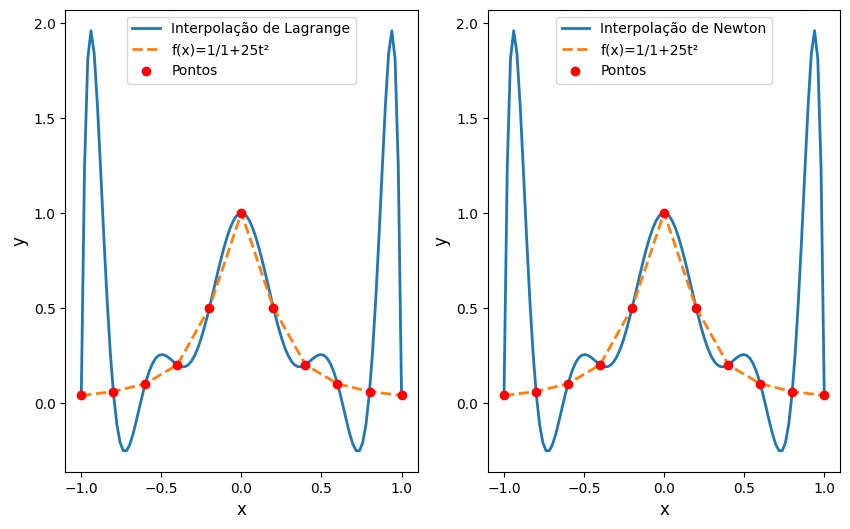

In [19]:
# Fun√ß√£o para calcular o valor interpolado em um ponto espec√≠fico

def interp_value_at(xi, yi, x_val, method='lagrange'):
    if method == 'lagrange':
        y_val = lagrange_interp(xi, yi, np.array([x_val]))
    elif method == 'newton':
        y_val = newton_interp(xi, yi, np.array([x_val]))
    else:
        raise ValueError("M√©todo desconhecido: use 'lagrange' ou 'newton'")
    return y_val[0]

x_11 = np.linspace(-1, 1, num=11, endpoint=True) # Intervalo e pontos de interpola√ß√£o
y_11 = f(x_11)

x = np.linspace(-1, 1, num=100, endpoint=True)

lagrange_y = lagrange_interp(x_11, y_11, x)
newton_y = newton_interp(x_11, y_11, x)


plt.figure(figsize=(10,6),facecolor='white')


plt.subplot(1, 2, 1)
plt.plot(x, lagrange_y, label = 'Interpola√ß√£o de Lagrange',linewidth = 2,zorder=1)
plt.plot(x_11, y_11, label = 'f(x)=1/1+25t¬≤',linewidth = 2,linestyle='--',zorder=2)
plt.scatter(x_11,y_11,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x, newton_y, label = 'Interpola√ß√£o de Newton',linewidth = 2,zorder=1)
plt.plot(x_11, y_11, label = 'f(x)=1/1+25t¬≤',linewidth = 2,linestyle='--',zorder=2)
plt.scatter(x_11,y_11,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')

plt.legend()
plt.show()

O resultado te√≥rico que justifica o fato das duas solu√ß√µes serem iguais √© a demonstra√ß√£o do teorema apresentado nos slides de Interpola√ß√£o:

*Dados $(n + 1)$ pontos $(x0, y0), . . . , (xn, yn) com x0 < ¬∑ ¬∑ ¬∑ < xn$, existe um √∫nico polin√¥mio $Pn(x) ‚àà Pn$ (polin√¥mio de grau $n$) que satisfaz as condi√ß√µes de interpola√ß√£o, isto √©, que passa exatamente por todos esses pontos.*

**Demonstra√ß√£o:**

Para cada ponto $(xi,yi)$, impomos a condi√ß√£o de interpola√ß√£o ao polin√¥mio $Pn(x)$:

Para cada ponto \((x_i, y_i)\), impomos a condi√ß√£o de interpola√ß√£o ao polin√¥mio \( P_n(x) \):

\\

$$ P_n(x) = a_0 + a_1x + a_2x^2 + \cdots + a_nx^n $$

\\

Logo,

$$ y_i = P_n(x_i) = a_0 + a_1x_i + a_2x_i^2 + \cdots + a_nx_i^n, \quad i = 0, \ldots, n $$

Isso pode ser escrito em forma de sistema linear como:

\\

$$
\begin{bmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^n \\
1 & x_1 & x_1^2 & \cdots & x_1^n \\
1 & x_2 & x_2^2 & \cdots & x_2^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^n
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\vdots \\
a_n
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$

\\

A matriz √† esquerda √© a matriz de Vandermonde \( X \). Para que exista uma solu√ß√£o √∫nica para o sistema, o determinante da matriz de Vandermonde deve ser n√£o nulo.

O determinante da matriz de Vandermonde √© dado por:

\\

$$ \det(X) = \prod_{i < k} (x_k - x_i) $$

\\

Como $( x_k \neq x_i $) para $( k \neq i )$, todos os termos $ (x_k - x_i) $ s√£o n√£o nulos, garantindo que o determinante √© n√£o nulo:

\\

$$ \det(X) \neq 0 $$

\\

Portanto, o sistema tem uma solu√ß√£o √∫nica, e o polin√¥mio interpolador $ P_n(x) $ √© √∫nico.

Sendo assim, tanto a interpola√ß√£o de Lagrange quanto a interpola√ß√£o de Newton calculam esse polin√¥mio interpolador √∫nico, embora utilizem m√©todos diferentes para faz√™-lo, como pode ser visto no c√≥digo de implementa√ß√£o acima.

## c) Repita o processo, agora utilizando 21 pontos. O que houve?


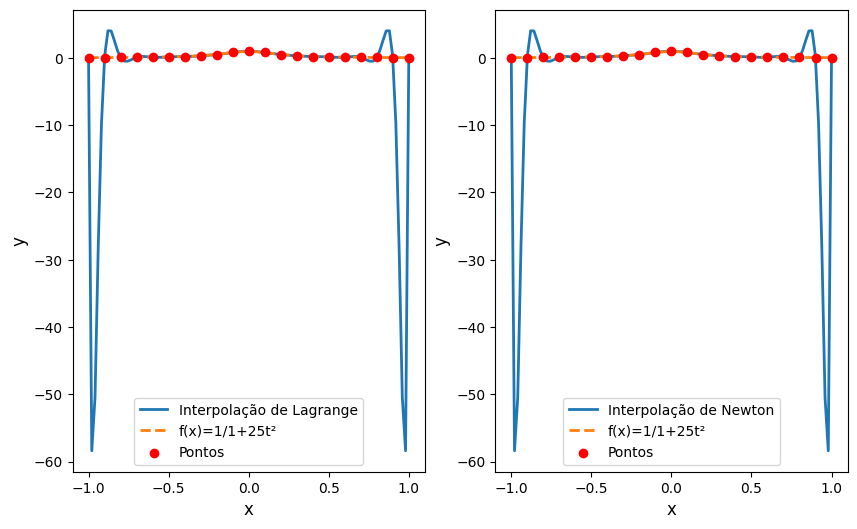

In [20]:
x_21 = np.linspace(-1, 1, num=21, endpoint=True) # Intervalo e pontos de interpola√ß√£o
y_21 = f(x_21)

x = np.linspace(-1, 1, num=100, endpoint=True)

lagrange_y = lagrange_interp(x_21, y_21, x)
newton_y = newton_interp(x_21, y_21, x)


plt.figure(figsize=(10,6),facecolor='white')


plt.subplot(1, 2, 1)
plt.plot(x, lagrange_y, label = 'Interpola√ß√£o de Lagrange',linewidth = 2,zorder=1)
plt.plot(x_21, y_21, label = 'f(x)=1/1+25t¬≤',linewidth = 2,linestyle='--',zorder=2)
plt.scatter(x_21,y_21,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x, newton_y, label = 'Interpola√ß√£o de Newton',linewidth = 2,zorder=1)
plt.plot(x_21, y_21, label = 'f(x)=1/1+25t¬≤',linewidth = 2,linestyle='--',zorder=2)
plt.scatter(x_21,y_21,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')

plt.legend()
plt.show()

Quando repetimos o processo de interpola√ß√£o usando 21 pontos igualmente espa√ßados no intervalo [‚àí1,1], observamos que a fun√ß√£o interpolada come√ßa a desestabilizar. Esse comportamento das interpola√ß√µes √© conhecido como o **Fen√¥meno de Runge**. O fen√¥meno de Runge ocorre quando aumentamos o n√∫mero de pontos de interpola√ß√£o de forma equidistante em um polin√¥mio de interpola√ß√£o de grau alto, levando a oscila√ß√µes indesejadas nas regi√µes de extremidades do intervalo.

*   N√£o h√° garantias que $P_n$ converge para $f$ quando $n ‚Üí ‚àû$
*   Interpolac√£o polinomial de alta ordem √© inst√°vel em uma
distribui√ß√£o uniforme de n√≥s.

Ao plotar o gr√°fico das interpola√ß√µes de Lagrange e Newton usando 21 pontos e compar√°-las com a fun√ß√£o original, notamos oscila√ß√µes acentuadas nas extremidades do intervalo, especificamente perto dos pontos -1 e 1. Essas oscila√ß√µes indesejadas s√£o caracter√≠sticas do Fen√¥meno de Runge. No entanto, a interpola√ß√£o melhora √† medida que nos aproximamos do centro do intervalo.

## d) Utilize a fun√ß√£o  scipy.interpolate.interp1d para calcular interpola√ß√µes c√∫bicas e lineares. Plote e compare com as solu√ß√µes anteriores.


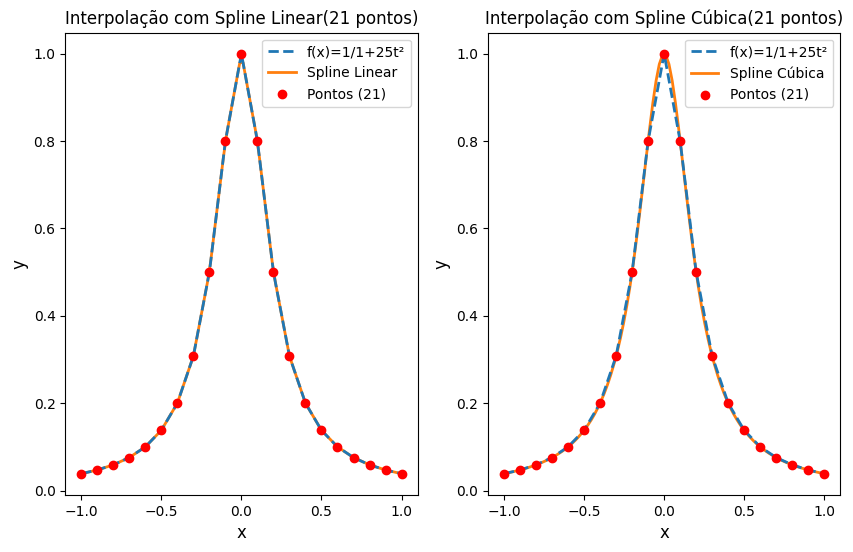

In [30]:
# Calculando interpola√ß√£o com spline linear e c√∫bica
f_linear = interp1d(x_21, y_21, kind='linear')
f_cubica = interp1d(x_21, y_21, kind='cubic')

# Calculando os valores interpolados para os gr√°ficos
y_linear = f_linear(x)
y_cubica = f_cubica(x)

plt.figure(figsize=(10,6),facecolor='white')

# Plotando os resultados
plt.subplot(1, 2, 1)
plt.plot(x_21, y_21, label='f(x)=1/1+25t¬≤', linewidth=2, linestyle='--', zorder=2)
plt.plot(x, y_linear, label='Spline Linear', linewidth=2, zorder=1)
plt.scatter(x_21, y_21, label='Pontos (21)', linewidth=1, facecolor='red', zorder=3)
plt.xlabel('x', fontsize='large')
plt.ylabel('y', fontsize='large')
plt.legend()
plt.title('Interpola√ß√£o com Spline Linear(21 pontos)')

# Plotando os resultados
plt.subplot(1, 2, 2)
plt.plot(x_21, y_21, label='f(x)=1/1+25t¬≤', linewidth=2, linestyle='--', zorder=2)
plt.plot(x, y_cubica, label='Spline C√∫bica', linewidth=2, zorder=1)
plt.scatter(x_21, y_21, label='Pontos (21)', linewidth=1, facecolor='red', zorder=3)
plt.xlabel('x', fontsize='large')
plt.ylabel('y', fontsize='large')
plt.legend()
plt.title('Interpola√ß√£o com Spline C√∫bica(21 pontos)')
plt.show()

### Conclus√£o - Diferen√ßas das solu√ß√µes deste item para os anteriores:

As splines dividem o intervalo em segmentos menores e usam polin√¥mios de baixa ordem (geralmente lineares ou c√∫bicos) em cada segmento. Isso permite que a interpola√ß√£o se ajuste melhor aos dados locais sem a necessidade de polin√¥mios de alta ordem que podem levar a oscila√ß√µes.

Sendo assim, os m√©todos de spline tendem a fornecer uma interpola√ß√£o mais suave e visualmente agrad√°vel em compara√ß√£o com os m√©todos de interpola√ß√£o polinomial de Lagrange e Newton, especialmente quando muitos pontos s√£o usados. As splines s√£o particularmente √∫teis quando se deseja evitar oscila√ß√µes indesejadas.

- **Suavidade**: As interpola√ß√µes de spline linear e c√∫bica s√£o suaves, ou seja, n√£o apresentam as oscila√ß√µes indesejadas do fen√¥meno de Runge. Elas fornecem curvas mais suaves e cont√≠nuas, mesmo com um n√∫mero maior de pontos de interpola√ß√£o.

- **Ajuste local**: As interpola√ß√µes de spline ajustam-se localmente aos dados, levando em considera√ß√£o os pontos vizinhos. Isso resulta em uma melhor adapta√ß√£o aos dados e menor sensibilidade a varia√ß√µes nos pontos de interpola√ß√£o e em regi√µes pr√≥ximas aos extremos do intervalo.

- **Controle de suavidade**: A interpola√ß√£o c√∫bica permite um maior controle sobre a suavidade da curva interpolada, pois utiliza polin√¥mios de terceiro grau entre os pontos de interpola√ß√£o.

## e) Repita os itens b) e c) com n√≥s de Chebyshev. Comente os resultados obtidos. Por que este resultado √© melhor do que os resultados obtidos nos itens b) e c) ?


<Figure size 1400x1000 with 0 Axes>

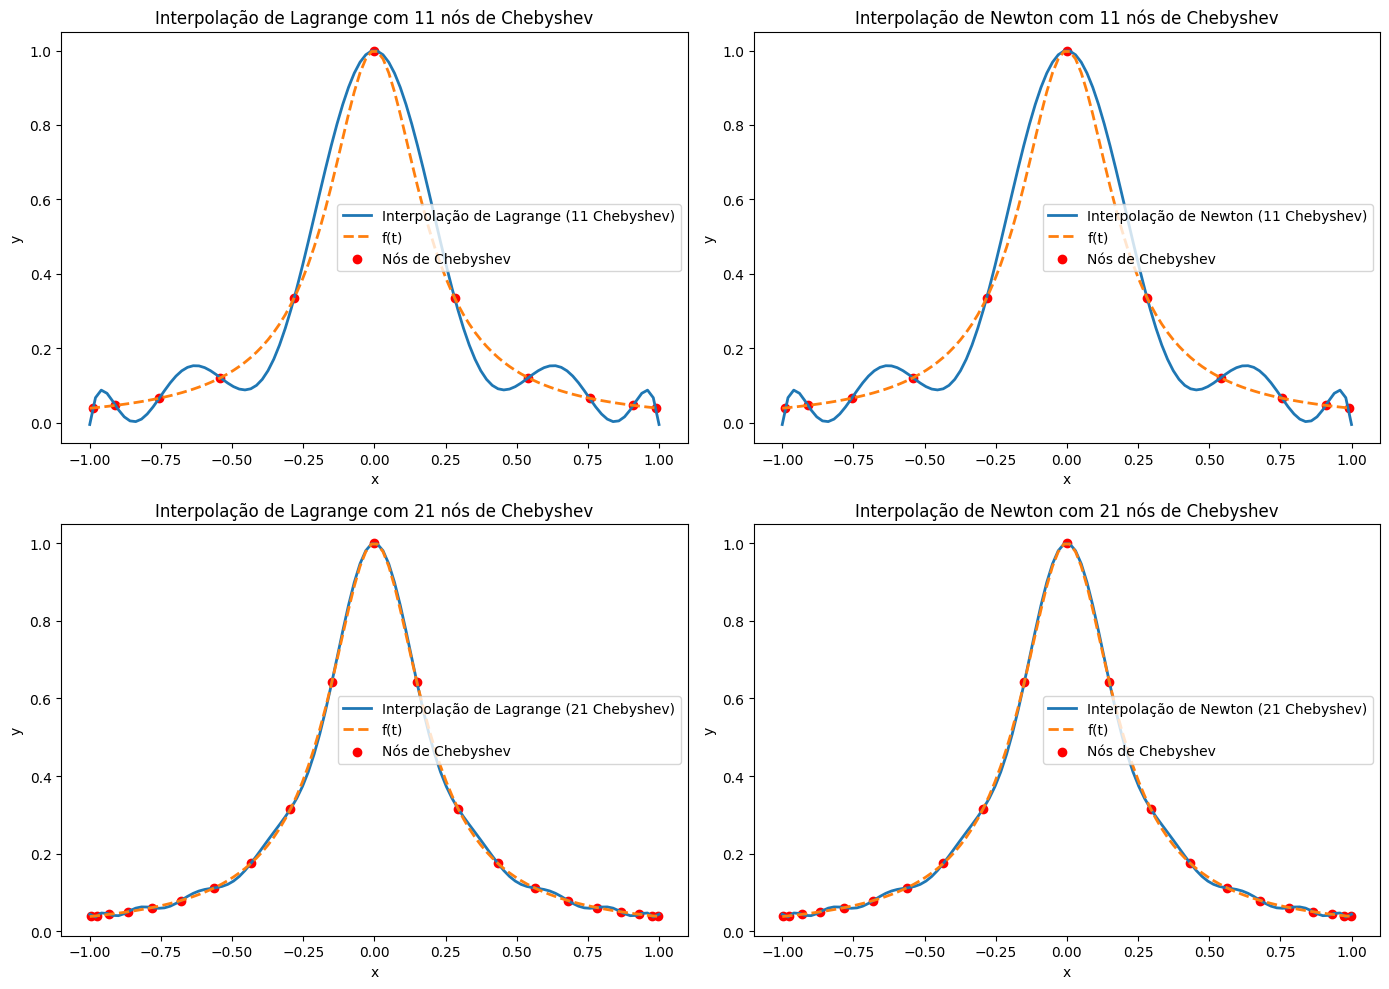

In [22]:
# Fun√ß√£o para gerar n√≥s de Chebyshev
def chebyshev_nodes(n, intervalo):
    a, b = intervalo
    k = np.arange(n)
    x_cheb = np.cos((2 * k + 1) * np.pi / (2 * n))
    return 0.5 * (a + b) + 0.5 * (b - a) * x_cheb


# Interpola√ß√£o com n√≥s de Chebyshev (11 pontos)
cheb_nodes_11 = chebyshev_nodes(11, [-1, 1])
y_cheb_11 = f(cheb_nodes_11)

lagrange_cheb_y_11 = lagrange_interp(cheb_nodes_11, y_cheb_11, x)
newton_cheb_y_11 = newton_interp(cheb_nodes_11, y_cheb_11, x)

# Interpola√ß√£o com n√≥s de Chebyshev (21 pontos)
cheb_nodes_21 = chebyshev_nodes(21, [-1, 1])
y_cheb_21 = f(cheb_nodes_21)

lagrange_cheb_y_21 = lagrange_interp(cheb_nodes_21, y_cheb_21, x)
newton_cheb_y_21 = newton_interp(cheb_nodes_21, y_cheb_21, x)

# Plotando os resultados
plt.figure(figsize=(14, 10), facecolor='white')



plt.tight_layout()
plt.show()

# Plotando os resultados para n√≥s de Chebyshev
plt.figure(figsize=(14, 10), facecolor='white')

# 11 n√≥s de Chebyshev
plt.subplot(2, 2, 1)
plt.plot(x, lagrange_cheb_y_11, label='Interpola√ß√£o de Lagrange (11 Chebyshev)', linewidth=2)
plt.plot(x, f(x), label='f(t)', linewidth=2, linestyle='--')
plt.scatter(cheb_nodes_11, y_cheb_11, label='N√≥s de Chebyshev', facecolor='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpola√ß√£o de Lagrange com 11 n√≥s de Chebyshev')

plt.subplot(2, 2, 2)
plt.plot(x, newton_cheb_y_11, label='Interpola√ß√£o de Newton (11 Chebyshev)', linewidth=2)
plt.plot(x, f(x), label='f(t)', linewidth=2, linestyle='--')
plt.scatter(cheb_nodes_11, y_cheb_11, label='N√≥s de Chebyshev', facecolor='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpola√ß√£o de Newton com 11 n√≥s de Chebyshev')

# 21 n√≥s de Chebyshev
plt.subplot(2, 2, 3)
plt.plot(x, lagrange_cheb_y_21, label='Interpola√ß√£o de Lagrange (21 Chebyshev)', linewidth=2)
plt.plot(x, f(x), label='f(t)', linewidth=2, linestyle='--')
plt.scatter(cheb_nodes_21, y_cheb_21, label='N√≥s de Chebyshev', facecolor='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpola√ß√£o de Lagrange com 21 n√≥s de Chebyshev')

plt.subplot(2, 2, 4)
plt.plot(x, newton_cheb_y_21, label='Interpola√ß√£o de Newton (21 Chebyshev)', linewidth=2)
plt.plot(x, f(x), label='f(t)', linewidth=2, linestyle='--')
plt.scatter(cheb_nodes_21, y_cheb_21, label='N√≥s de Chebyshev', facecolor='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpola√ß√£o de Newton com 21 n√≥s de Chebyshev')

plt.tight_layout()
plt.show()

### Conclus√£o:

Os n√≥s de Chebyshev s√£o uma escolha √≥tima para minimizar o erro de interpola√ß√£o polinomial. Eles s√£o distribu√≠dos de forma a concentrar mais pontos nas extremidades do intervalo e menos pontos no meio. Essa distribui√ß√£o reduz significativamente o fen√¥meno de Runge, que √© a oscila√ß√£o indesejada dos polin√¥mios interpoladores de alta ordem, especialmente perto das extremidades do intervalo. Eles s√£o definidos usando os polin√¥mios de Chebyshev e s√£o distribu√≠dos de maneira que sejam mais densos nas extremidades do intervalo e menos densos no meio. Isso ajuda a reduzir as oscila√ß√µes indesejadas dos polin√¥mios de alta ordem.

Como visto no item anterior, n√≥s igualmente espa√ßados aumentam o erro. Assim, os n√≥s de Chebyshev s√£o uma maneira de calcular pontos que permitem melhores interpola√ß√µes.

Ao plotar os gr√°ficos, √© poss√≠vel observar que mesmo aumentando o n√∫mero de n√≥s as interpola√ß√µes calculadas se portam bem.


# Exerc√≠cio 3: M√≠nios Quadrados

Vamos supor que os casos acumulados de Covid-19, no per√≠odo inicial da pandemia, de 26 de fevereiro de 2020 a 18 de junho de 2020 s√£o dados em casosacumuladosbrasilatuaizado.txt. O objetivo deste exerc√≠cio √© estudar o ajuste dos dados, no sentido dos m√≠nimos quadrados, a uma fun√ß√£o $g(x) = ab^x$, com $a, b ‚àà R$. Vamos utilizar os c√≥digos implementados em aula:


In [23]:
def mmq_qr(x, y, k):
  X = np.vander(x, k)
  Q, R = np.linalg.qr(X)
  b = Q.T @ y
  a = np.linalg.solve(R, b)
  return a


def mmq(x, y, k):
  X = np.vander(x, k)
  A = X.T @ X
  b = X.T @ y
  a = np.linalg.solve(A, b)
  return a


## a) Explique cada um dos c√≥digos dados acima. O que est√° sendo calculado ?

Os dois c√≥digos fornecem m√©todos para ajustar uma curva aos dados usando o m√©todo dos m√≠nimos quadrados (MMQ). Eles implementam duas abordagens diferentes para resolver o problema de m√≠nimos quadrados: uma usando a equa√ß√£o normal e outra usando a decomposi√ß√£o QR.

- Na abordagem usando a equa√ß√£o normal, a matriz de Vandermonde √© constru√≠da a partir dos valores de x, e a solu√ß√£o √© obtida multiplicando as transpostas dessa matriz e resolvendo o sistema linear resultante. Essa abordagem √© direta e simples de implementar. No entanto, a equa√ß√£o normal pode ser numericamente inst√°vel quando lidamos com matrizes mal condicionadas, ou seja, uma matriz que √© muito sens√≠vel aos erros de aproxima√ß√£o cometidos em c√°lculos num√©ricos usualmente executados no tratamento de problemas aplicados, podendo levar a resultados imprecisos.

- Para isso, a fatora√ß√£o QR oferece uma solu√ß√£o alternativa em m√≠nimos quadrados para um sistema linear $Ax = b:$ se $A = QR$. Nesta abordagem, a matriz de Vandermonde √© decomposta em uma matriz ortogonal Q e uma matriz triangular superior R, e o sistema linear resultante √© ent√£o resolvido. A vantagem principal da decomposi√ß√£o QR √© a sua maior estabilidade num√©rica, o que a torna especialmente √∫til para matrizes mal condicionadas. Entretanto, essa abordagem pode ser mais computacionalmente custosa em compara√ß√£o com a equa√ß√£o normal, dado o fato da matriz R ser triangular superior.


## b) Aproxime, no sentido dos m√≠nimos quadrados, os dados do per√≠odo completo, de 26 de fevereiro de 2020 a 18 de junho de 2020, por uma fun√ß√£o $g(x) = ab^x$, com $a, b ‚àà R$. Use um dos c√≥digos dados acima.

Para realizar a aproxima√ß√£o dos dados no sentido dos m√≠nimos quadrados precisamos seguir os seguintes passos:

1) Carregar os dados do arquivo de texto;

2) Transformar a fun√ß√£o exponencial em uma forma lineariz√°vel;

3) Aplicar o m√©todo dos m√≠nimos quadrados para ajustar a fun√ß√£o linearizada;

4) Calcular os par√¢metros da fun√ß√£o original.

In [24]:
#1 Carregar os dados do arquivo de texto

def carregar_dados():
    data = np.loadtxt(FILE_PATH_2)
    x = np.arange(1, len(data) + 1)  #dias correspondentes aos dados
    print(x)
    y = data  #n√∫mero de casos
    return x, y

### Transformar a fun√ß√£o exponencial em uma forma lineariz√°vel.

$$y = ab^x$$

$$log(y) = log(a) + xlog(b)$$

\\

Fazendo com que $y = log(a), a = log(a)$ e $b = log(b)$, temos:

$$ y = a +bx$$

### Aplicar o m√©otdo √† fun√ß√£o linearizada

In [31]:
x, y = carregar_dados()

# y = np.log(y) -- ajuste para linearizar
coeficientes = mmq(x, np.log(y),2) #coeficientes a e b est√£o invertidos

#imprimir os coeficientes
print("Coeficientes ajustados:")
print(f"a =",coeficientes[1])
print(f"b =",coeficientes[0])

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118]
Coeficientes ajustados:
a = 3.4586750364025454
b = 0.10557730812239277


### Calcular os par√¢metros originais:

In [26]:
def f(x):
    return np.exp(coeficientes[1]) * np.exp(coeficientes[0])**x

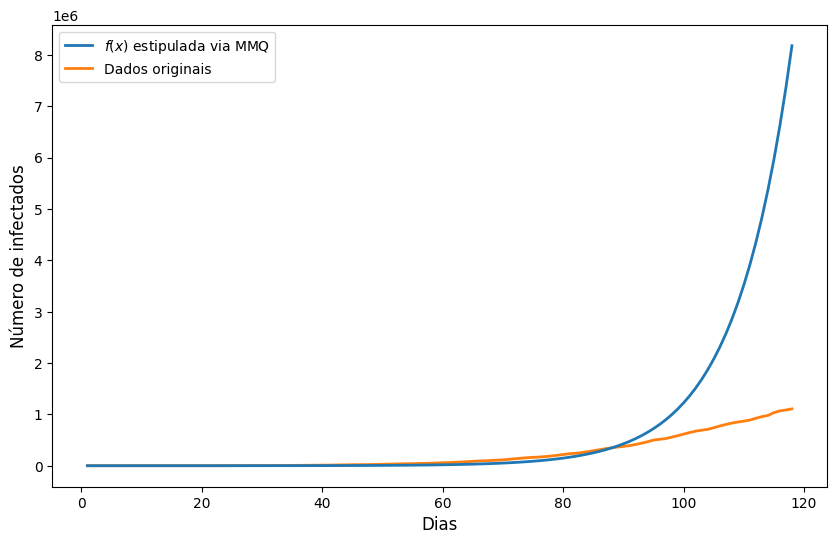

In [32]:
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x, f(x), label = '$f(x)$ estipulada via MMQ',linewidth = 2,linestyle='-',zorder=2)
plt.plot(x, y, label = 'Dados originais',linewidth = 2,zorder=1)
plt.xlabel('Dias',fontsize='large')
plt.ylabel('N√∫mero de infectados',fontsize='large')

plt.legend()
plt.show()

## c) Repita o item b) usando apenas os 20 primeiros dias.


Coeficientes ajustados:
a = -0.8326707582076477
b = 0.3160641546747851


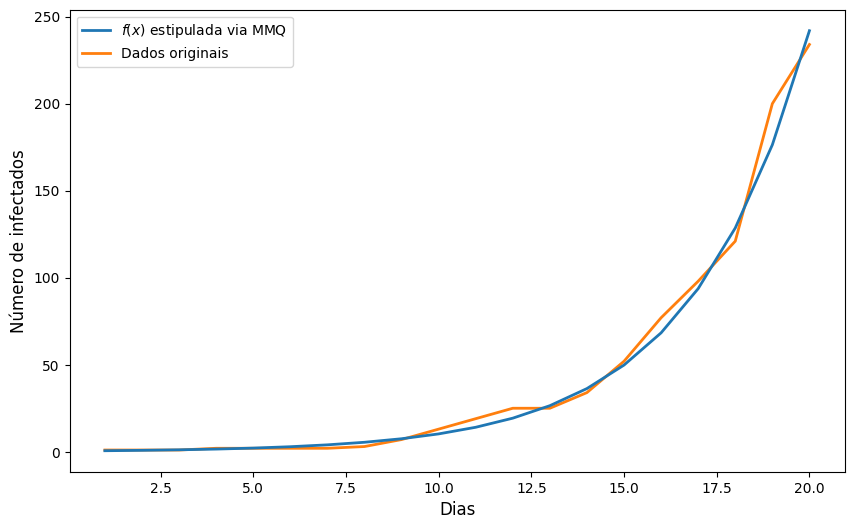

In [33]:
x_20 = x[:20]
y_20 = y[:20]

coeficientes = mmq_qr(x_20, np.log(y_20), 2) #coeficientes a e b est√£o invertidos


#imprimir os coeficientes
print("Coeficientes ajustados:")
print(f"a =",coeficientes[1])
print(f"b =",coeficientes[0])

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x_20, f(x_20), label = '$f(x)$ estipulada via MMQ',linewidth = 2,linestyle='-',zorder=2)
plt.plot(x_20, y_20, label = 'Dados originais',linewidth = 2,zorder=1)
plt.xlabel('Dias',fontsize='large')
plt.ylabel('N√∫mero de infectados',fontsize='large')
plt.legend()
plt.show()


## d) Repita o √≠tem b) usando apenas os 50 √∫ltimos dias.

Coeficientes ajustados:
a = 7.798501737394586
b = 0.054476229013592226


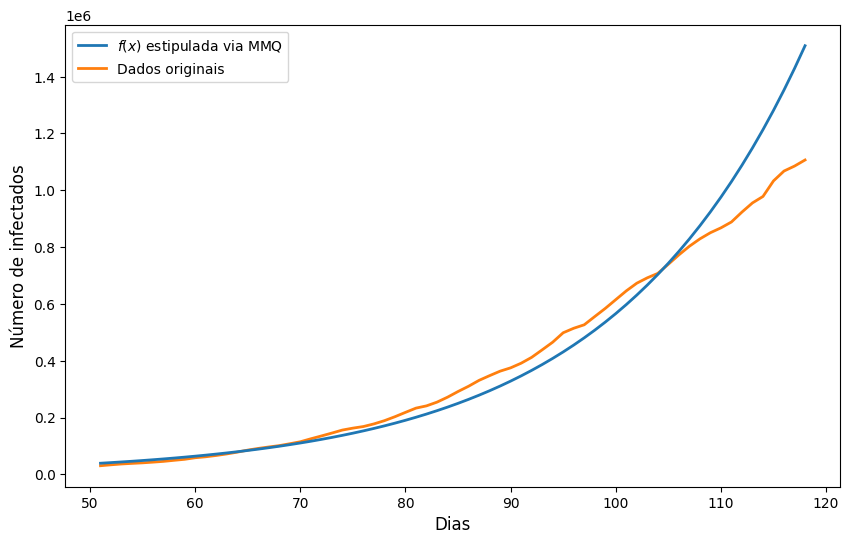

In [34]:
x_50 = x[50:]
y_50 = y[50:]

coeficientes = mmq_qr(x_50, np.log(y_50), 2)

#imprimir os coeficientes
print("Coeficientes ajustados:")
print(f"a =",coeficientes[1])
print(f"b =",coeficientes[0])

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x_50, f(x_50), label = '$f(x)$ estipulada via MMQ',linewidth = 2,linestyle='-',zorder=2)
plt.plot(x_50, y_50, label = 'Dados originais',linewidth = 2,zorder=1)
plt.xlabel('Dias',fontsize='large')
plt.ylabel('N√∫mero de infectados',fontsize='large')

plt.legend()
plt.show()

### Conclus√£o: Compare os itens b), c) e d). Que tipo de informa√ß√£o os dados nos fornecem?

A curva com todos os dias completos mostra a tend√™ncia geral. Ao analisar com mais profundidade, nos primeiros 20 dias, podemos ver como os casos evolu√≠ram sem medidas preventivas significativas. No in√≠cio, parecia que a evolu√ß√£o dos casos seguia uma tend√™ncia exponencial clara e consistente. No entanto, √† medida que avan√ßamos para os √∫ltimos 50 dias, com o apoio de medidas externas, foram implementadas medidas que puderam achatar a curva, diminuindo o n√∫mero di√°rio de infectados.

Em resumo, inicialmente a dissemina√ß√£o dos casos parecia seguir um padr√£o exponencial, mas com o passar do tempo e a implementa√ß√£o de medidas preventivas, a tend√™ncia mudou, mostrando uma normaliza√ß√£o e uma redu√ß√£o no crescimento di√°rio de casos. Isso evidencia a import√¢ncia das interven√ß√µes e pol√≠ticas p√∫blicas na modula√ß√£o da trajet√≥ria da pandemia.
